# Maze Visualization Demo

This notebook demonstrates the visualization capabilities of the maze runner game using the visualization utilities from the project.

In [13]:
import sys
import pygame
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import our maze game modules
from src.maze import create_maze
from src.visualization import visualize_maze, JupyterExplorer
from src.explorer import Explorer
from src.constants import WINDOW_SIZE

## Initialize Pygame for Jupyter

We need to initialize Pygame in a way that works with Jupyter notebooks.

In [14]:
# Initialize Pygame
pygame.init()
screen = pygame.display.set_mode((WINDOW_SIZE, WINDOW_SIZE))
pygame.display.set_caption("Maze Explorer - Jupyter Visualization")

## Create and Visualize a Random Maze

Let's create a random maze and visualize it using the visualization utilities.

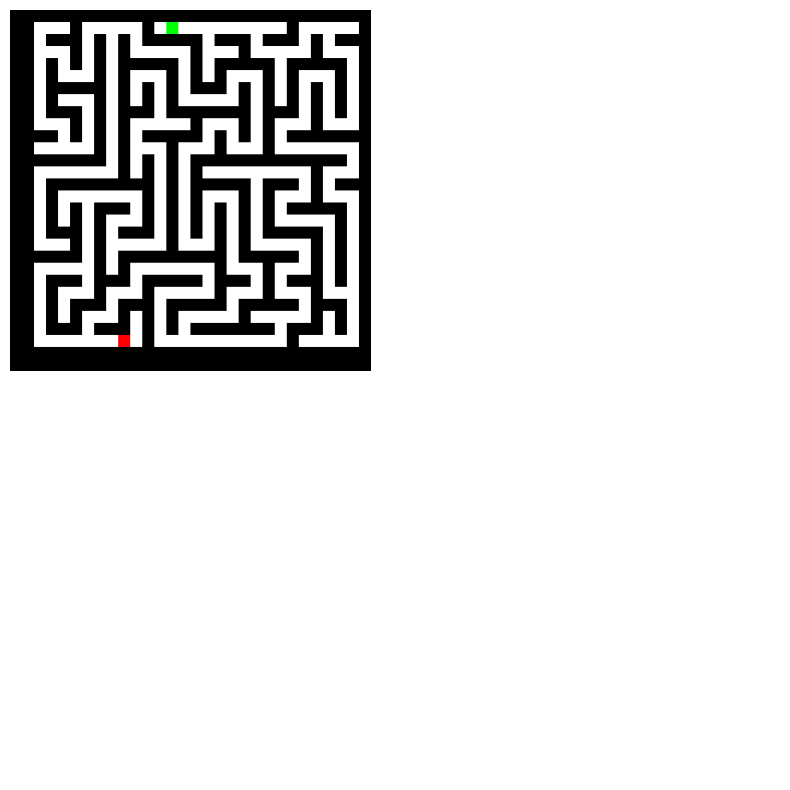

In [15]:
# Create and visualize a random maze
maze = create_maze(30, 30, "random")
visualize_maze(maze, screen)

## Animated Maze Solving

Let's use the JupyterExplorer to solve the maze with animation.

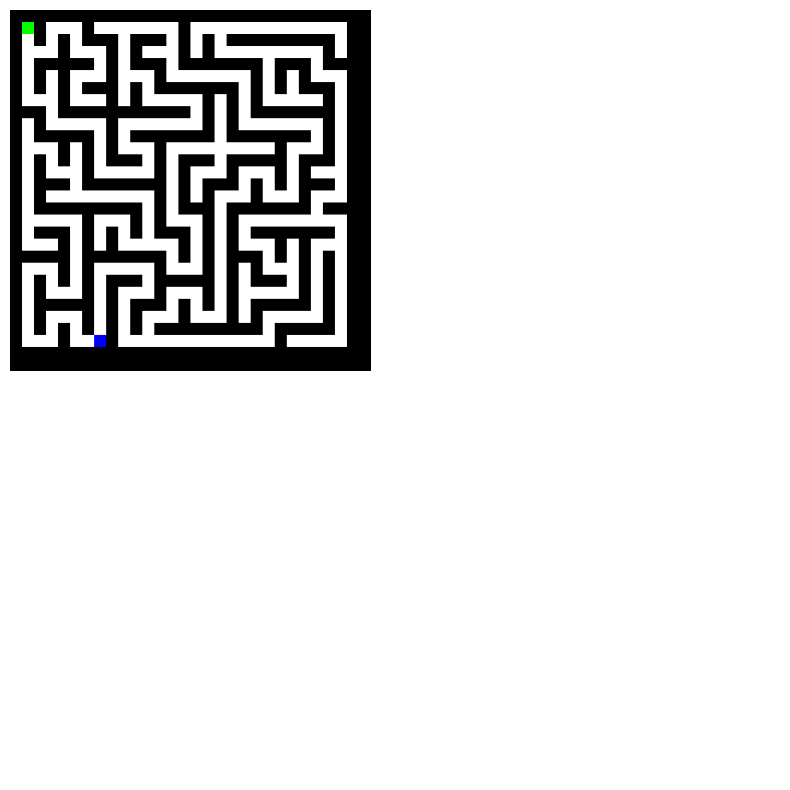

In [ ]:
# Create maze and explorer
maze = create_maze(30, 30, "random")
explorer = JupyterExplorer(maze, screen)

# Run the explorer
time_taken, moves = explorer.solve()
print(f"Maze solved in {time_taken:.2f} seconds")
print(f"Number of moves: {len(moves)}")

## Compare Different Maze Types

Let's compare the visualization of random and static mazes.

Random Maze:


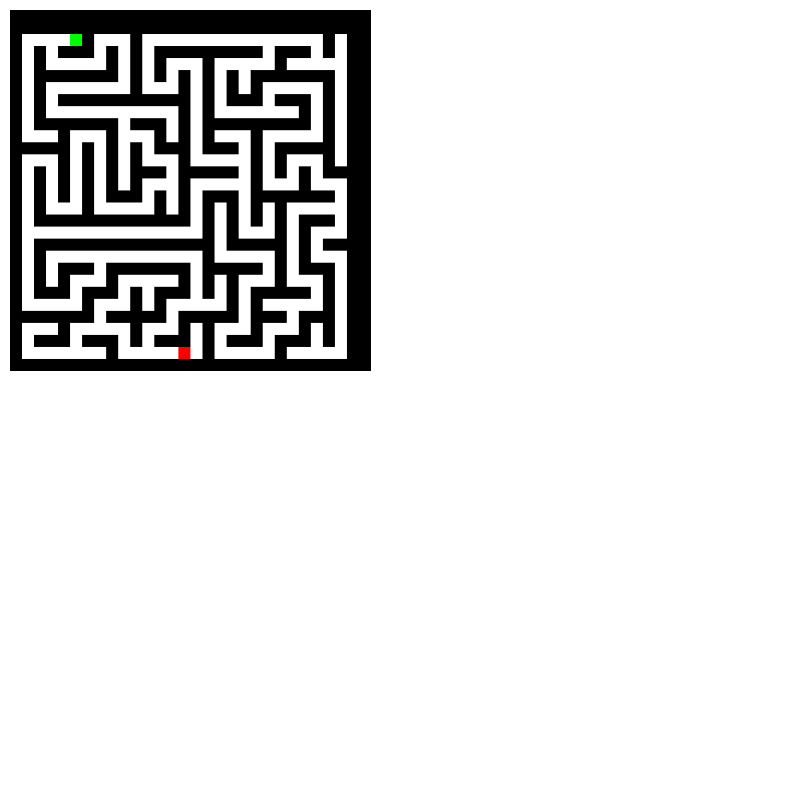

Static Maze:


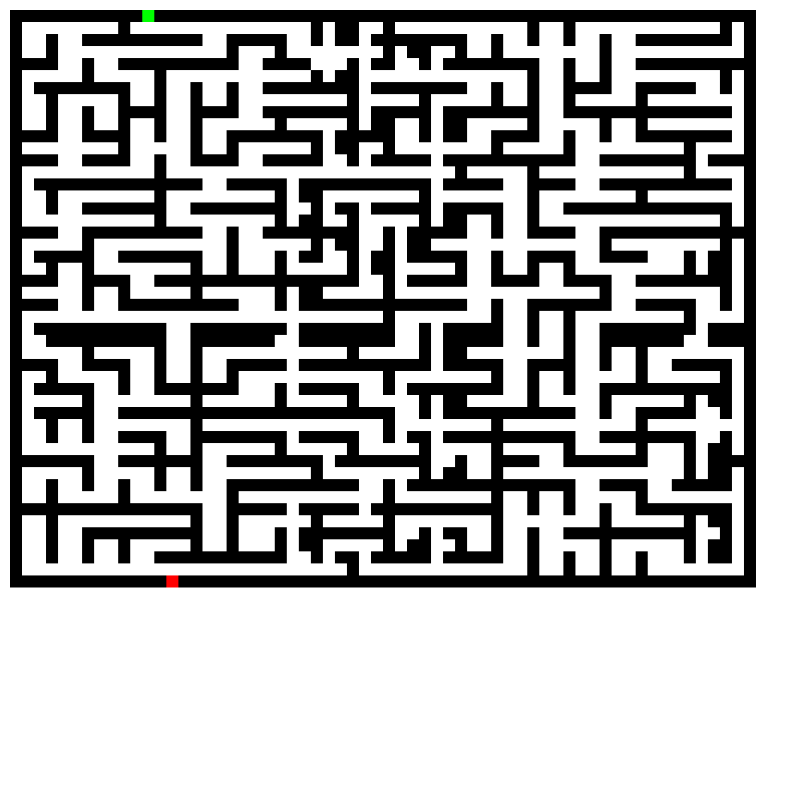

In [ ]:
# To fix the error: display Surface quit
# Safely reinitialize Pygame
pygame.quit() # Close the previous Pygame window
pygame.init() # Reinitialize the screen

# Create a new screen
screen = pygame.display.set_mode((WINDOW_SIZE, WINDOW_SIZE))
pygame.display.set_caption("Maze Explorer - Jupyter Visualization")

# Create and visualize a random maze
random_maze = create_maze(30, 30, "random")
print("Random Maze:")
visualize_maze(random_maze, screen)

# Create and visualize a static maze
static_maze = create_maze(30, 30, "static")
print("Static Maze:")
visualize_maze(static_maze, screen)

## Performance Analysis

Let's analyze the performance of the automated explorer on different maze types (without visualization: visualize = False)

In [ ]:
def run_exploration(maze_type, width, height):
    maze = create_maze(width, height, maze_type)
    explorer = Explorer(maze, visualize=False)
    start_time = time.time()
    time_taken, moves = explorer.solve()
    return {
        'maze_type': maze_type,
        'time_taken': time_taken,
        'moves': len(moves),
        'moves_per_second': len(moves) / time_taken
    }

# Run multiple explorations
results = []
for maze_type in ['random', 'static']:
    for _ in range(3):  # Run each type 3 times
        result = run_exploration(maze_type, 30, 30)
        results.append(result)
print("Simulation Done")
# Display results
df = pd.DataFrame(results)
print("Exploration Results:")
print(df.groupby('maze_type').mean())


=== Maze Exploration Statistics ===
Total time taken: 18.52 seconds
Total moves made: 559
Number of backtrack operations: 0
Average moves per second: 30.18


=== Maze Exploration Statistics ===
Total time taken: 19.79 seconds
Total moves made: 597
Number of backtrack operations: 0
Average moves per second: 30.16


=== Maze Exploration Statistics ===
Total time taken: 13.70 seconds
Total moves made: 413
Number of backtrack operations: 0
Average moves per second: 30.15


=== Maze Exploration Statistics ===
Total time taken: 42.35 seconds
Total moves made: 1279
Number of backtrack operations: 0
Average moves per second: 30.20


=== Maze Exploration Statistics ===
Total time taken: 42.36 seconds
Total moves made: 1279
Number of backtrack operations: 0
Average moves per second: 30.19


=== Maze Exploration Statistics ===
Total time taken: 42.36 seconds
Total moves made: 1279
Number of backtrack operations: 0
Average moves per second: 30.20

Simulation Done
Exploration Results:
           t

## Performance Analysis

Let's analyze the performance of the automated explorer on different maze types (with visualization: visualize = True)

In [ ]:
def run_exploration(maze_type, width, height):
    maze = create_maze(width, height, maze_type)
    explorer = Explorer(maze, visualize=True)
    start_time = time.time()
    time_taken, moves = explorer.solve()
    return {
        'maze_type': maze_type,
        'time_taken': time_taken,
        'moves': len(moves),
        'moves_per_second': len(moves) / time_taken
    }

# Run multiple explorations
results = []
for maze_type in ['random', 'static']:
    for _ in range(3):  # Run each type 3 times
        result = run_exploration(maze_type, 30, 30)
        results.append(result)
print("Simulation Done")
# Display results
df = pd.DataFrame(results)
print("Exploration Results:")
print(df.groupby('maze_type').mean())